<a href="https://colab.research.google.com/github/Nscaglio/4105/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/ECGR4105/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

In [3]:
#converts the yes/no to 1/0
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [11]:
from sklearn.model_selection import train_test_split
#sets the distribution rates for the training and test sets and distributes them
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [12]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    J = 1 / (2 * m) * np.sum(np.square(errors))
    return J

In [13]:
def gradient_descent(X_tr,X_test, y_tr,y_test, theta, alpha, iterations):
    m = len(y)  # Number of training examples
    loss_history = [] #starts an array iterations long
    test_loss_history = []
    for i in range(iterations):
        predictions = X_tr.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha/m ) * X_tr.transpose().dot(errors)
        theta = theta - sum_delta          #sets this iterations theta
        loss_history.append(compute_cost(X_tr, y_tr, theta))  # computes and saves the current iterations cost and adds it to the set
        test_loss_history.append(compute_cost(X_test, y_test, theta)) # computes the loss of the current theta to the training set and adds it to the set

    return theta, loss_history, test_loss_history

1.A

In [14]:
#sets up the training data
x1=df_train.values[:, 1]#area
x2=df_train.values[:, 2]#bedrooms
x3=df_train.values[:, 3]#bathrooms
x4=df_train.values[:, 4]#stories
x5=df_train.values[:, 10]#parking
y=df_train.values[:, 0]#price
m=len(y)
X_0 = np.ones((m, 1))
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)
X_4 = x5.reshape(m, 1)
X_5 = x5.reshape(m, 1)
X_train=np.hstack((X_0, X_1,X_2,X_3,X_4,X_5)) #stack the matricies
theta=np.zeros(6)#set the theta for a 6D array
#sets up testing set
x1t=df_test.values[:, 1]#area
x2t=df_test.values[:, 2]#bedrooms
x3t=df_test.values[:, 3]#bathrooms
x4t=df_test.values[:, 4]#stories
x5t=df_test.values[:, 10]#parking
yt=df_test.values[:, 0]#price
mt=len(yt)
X_0t = np.ones((mt, 1))
X_1t = x1t.reshape(mt, 1)
X_2t = x2t.reshape(mt, 1)
X_3t = x3t.reshape(mt, 1)
X_4t = x5t.reshape(mt, 1)
X_5t = x5t.reshape(mt, 1)
X_test=np.hstack((X_0t, X_1t,X_2t,X_3t,X_4t,X_5t)) #stack the matricies

In [15]:
iterations = 1500
alpha = 0.05

In [9]:
theta, train_cost, test_cost = gradient_descent(X_train, X_test, y, yt, theta, alpha, iterations) #calculate the gradient

<ipython-input-5-fd94d82daba3>:4: RuntimeWarning: overflow encountered in square
  J = 1 / (2 * m) * np.sum(np.square(errors))
<ipython-input-6-ea7a4d1c7924>:9: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta          #sets this iterations theta


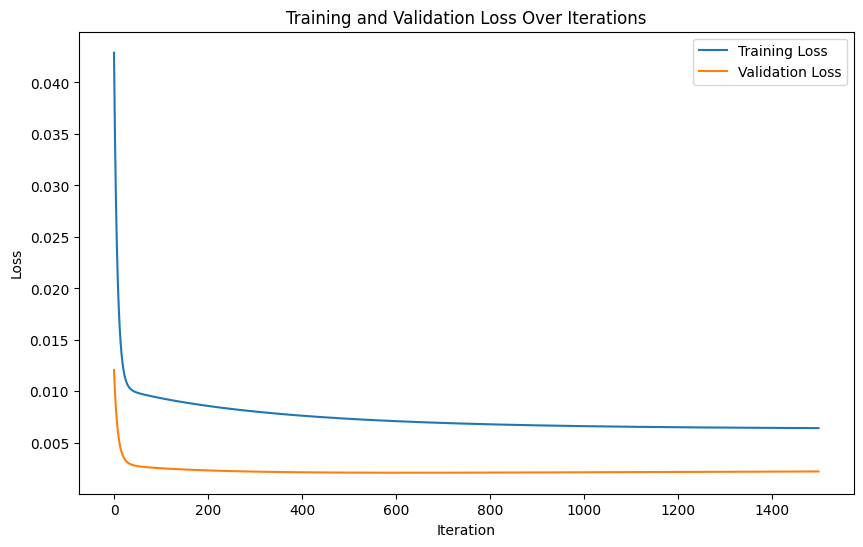

In [84]:
#plot the loss through the iterations for both training and test
plt.plot(train_cost, label="Training Loss")
plt.plot(test_cost, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

1.B

In [85]:
#sets up the training data
x1=df_train.values[:, 1]#area
x2=df_train.values[:, 2]#bedrooms
x3=df_train.values[:, 3]#bathrooms
x4=df_train.values[:, 4]#stories
x5=df_train.values[:, 5]#mainroad
x6=df_train.values[:, 6]#guestroom
x7=df_train.values[:, 7]#basement
x8=df_train.values[:, 8]#hotwater
x9=df_train.values[:, 9]#airconditioning
x10=df_train.values[:, 10]#parking
x11=df_train.values[:, 11]#prefarea
y=df_train.values[:, 0]#price
m=len(y)
X_0 = np.ones((m, 1))
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)
X_4 = x5.reshape(m, 1)
X_5 = x5.reshape(m, 1)
X_6 = x6.reshape(m, 1)
X_7 = x7.reshape(m, 1)
X_8 = x8.reshape(m, 1)
X_9 = x9.reshape(m, 1)
X_10 = x10.reshape(m, 1)
X_11 = x11.reshape(m, 1)
X_train2=np.hstack((X_0, X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11)) #stack the matricies
theta2=np.zeros(12)#set the theta for a 12D array
#sets up testing set
#sets up the training data
x1t=df_test.values[:, 1]#area
x2t=df_test.values[:, 2]#bedrooms
x3t=df_test.values[:, 3]#bathrooms
x4t=df_test.values[:, 4]#stories
x5t=df_test.values[:, 5]#mainroad
x6t=df_test.values[:, 6]#guestroom
x7t=df_test.values[:, 7]#basement
x8t=df_test.values[:, 8]#hotwater
x9t=df_test.values[:, 9]#airconditioning
x10t=df_test.values[:, 10]#parking
x11t=df_test.values[:, 11]#prefarea
yt=df_test.values[:, 0]#price
mt=len(yt)
X_0t = np.ones((mt, 1))
X_1t = x1t.reshape(mt, 1)
X_2t = x2t.reshape(mt, 1)
X_3t = x3t.reshape(mt, 1)
X_4t = x5t.reshape(mt, 1)
X_5t = x5t.reshape(mt, 1)
X_6t = x6t.reshape(mt, 1)
X_7t = x7t.reshape(mt, 1)
X_8t = x8t.reshape(mt, 1)
X_9t = x9t.reshape(mt, 1)
X_10t = x10t.reshape(mt, 1)
X_11t = x11t.reshape(mt, 1)
X_test2=np.hstack((X_0t, X_1t,X_2t,X_3t,X_4t,X_5t,X_6t,X_7t,X_8t,X_9t,X_10t,X_11t)) #stack the matricies

In [88]:
theta, train_cost2, test_cost2 = gradient_descent(X_train2, X_test2, y, yt, theta2, alpha, iterations) #calculate the gradient

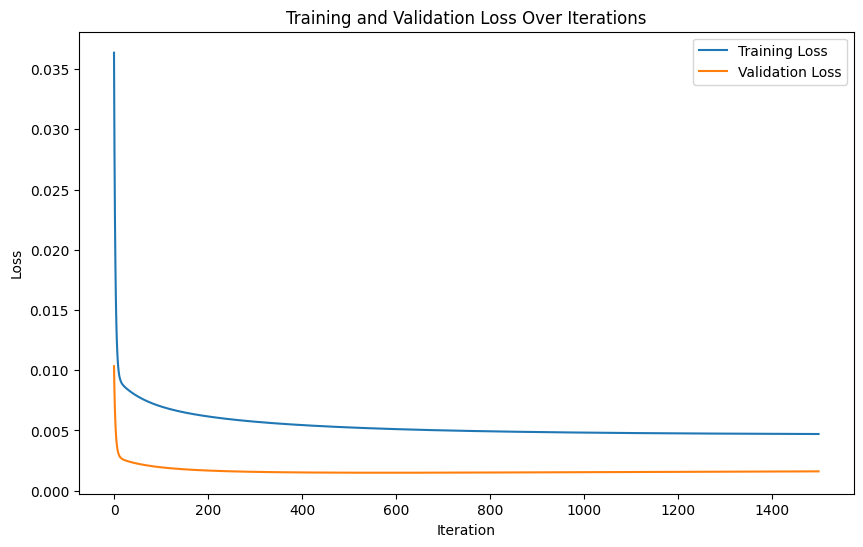

In [87]:
#plot the loss through the iterations for both training and test
plt.plot(train_cost2, label="Training Loss")
plt.plot(test_cost2, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

2.A

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
num_vars2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train_norm = df_train.copy()
df_test_norm = df_test.copy()
df_train_standard=df_train.copy()
df_test_standard=df_test.copy()
# normalizes
df_train_norm[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test_norm[num_vars] = scaler.fit_transform(df_test[num_vars])
#standardize
df_train_standard[num_vars2] = standard_scaler.fit_transform(df_train[num_vars2])
df_test_standard[num_vars2] = standard_scaler.transform(df_test[num_vars2])

Normalized prediction

In [ ]:
#sets up the training data
x1=df_train_norm.values[:, 1]#area
x2=df_train_norm.values[:, 2]#bedrooms
x3=df_train_norm.values[:, 3]#bathrooms
x4=df_train_norm.values[:, 4]#stories
x5=df_train_norm.values[:, 10]#parking
y=df_train_norm.values[:, 0]#price
m=len(y)
X_0 = np.ones((m, 1))
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)
X_4 = x5.reshape(m, 1)
X_5 = x5.reshape(m, 1)
X_train=np.hstack((X_0, X_1,X_2,X_3,X_4,X_5)) #stack the matricies
theta=np.zeros(6)#set the theta for a 6D array
#sets up testing set
x1t=df_test_norm.values[:, 1]#area
x2t=df_test_norm.values[:, 2]#bedrooms
x3t=df_test_norm.values[:, 3]#bathrooms
x4t=df_test_norm.values[:, 4]#stories
x5t=df_test_norm.values[:, 10]#parking
yt=df_test_norm.values[:, 0]#price
mt=len(yt)
X_0t = np.ones((mt, 1))
X_1t = x1t.reshape(mt, 1)
X_2t = x2t.reshape(mt, 1)
X_3t = x3t.reshape(mt, 1)
X_4t = x5t.reshape(mt, 1)
X_5t = x5t.reshape(mt, 1)
X_test=np.hstack((X_0t, X_1t,X_2t,X_3t,X_4t,X_5t)) #stack the matricies

In [ ]:
theta, train_cost, test_cost = gradient_descent(X_train, X_test, y, yt, theta, alpha, iterations) #calculate the gradient

In [ ]:
#plot the loss through the iterations for both training and test
plt.plot(train_cost, label="Training Loss")
plt.plot(test_cost, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

standardized prediction

2.B

In [ ]:
#sets up the training data
x1=df_train.values[:, 1]#area
x2=df_train.values[:, 2]#bedrooms
x3=df_train.values[:, 3]#bathrooms
x4=df_train.values[:, 4]#stories
x5=df_train.values[:, 5]#mainroad
x6=df_train.values[:, 6]#guestroom
x7=df_train.values[:, 7]#basement
x8=df_train.values[:, 8]#hotwater
x9=df_train.values[:, 9]#airconditioning
x10=df_train.values[:, 10]#parking
x11=df_train.values[:, 11]#prefarea
y=df_train.values[:, 0]#price
m=len(y)
X_0 = np.ones((m, 1))
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)
X_4 = x5.reshape(m, 1)
X_5 = x5.reshape(m, 1)
X_6 = x6.reshape(m, 1)
X_7 = x7.reshape(m, 1)
X_8 = x8.reshape(m, 1)
X_9 = x9.reshape(m, 1)
X_10 = x10.reshape(m, 1)
X_11 = x11.reshape(m, 1)
X_train2=np.hstack((X_0, X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11)) #stack the matricies
theta2=np.zeros(12)#set the theta for a 12D array
#sets up testing set
#sets up the training data
x1t=df_test.values[:, 1]#area
x2t=df_test.values[:, 2]#bedrooms
x3t=df_test.values[:, 3]#bathrooms
x4t=df_test.values[:, 4]#stories
x5t=df_test.values[:, 5]#mainroad
x6t=df_test.values[:, 6]#guestroom
x7t=df_test.values[:, 7]#basement
x8t=df_test.values[:, 8]#hotwater
x9t=df_test.values[:, 9]#airconditioning
x10t=df_test.values[:, 10]#parking
x11t=df_test.values[:, 11]#prefarea
yt=df_test.values[:, 0]#price
mt=len(yt)
X_0t = np.ones((mt, 1))
X_1t = x1t.reshape(mt, 1)
X_2t = x2t.reshape(mt, 1)
X_3t = x3t.reshape(mt, 1)
X_4t = x5t.reshape(mt, 1)
X_5t = x5t.reshape(mt, 1)
X_6t = x6t.reshape(mt, 1)
X_7t = x7t.reshape(mt, 1)
X_8t = x8t.reshape(mt, 1)
X_9t = x9t.reshape(mt, 1)
X_10t = x10t.reshape(mt, 1)
X_11t = x11t.reshape(mt, 1)
X_test2=np.hstack((X_0t, X_1t,X_2t,X_3t,X_4t,X_5t,X_6t,X_7t,X_8t,X_9t,X_10t,X_11t)) #stack the matricies

In [ ]:
theta, train_cost2, test_cost2 = gradient_descent(X_train2, X_test2, y, yt, theta2, alpha, iterations) #calculate the gradient

In [ ]:
#plot the loss through the iterations for both training and test
plt.plot(train_cost2, label="Training Loss")
plt.plot(test_cost2, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()